Với cách tiếp cận thứ ba: Ta sẽ sử dụng phương pháp chọn đặc trưng cho các Time Series (Feature Selection). Nếu ta coi các trục X, Y, Z là các mẫu theo đổi theo thời gian, ta có thể trích xuất được các thống kê từ mẫu trên. Cùng với đó ta sẽ thực hiện phép biến đổi Fourier nhanh để biến đổi các chuỗi thời gian thành thành phần tần số của chúng. Sau đó ta cũng sẽ trích xuât các giá trị thống kê trên các dữ liệu đã FFT để có được các đặc trưng của dữ liệu

## HMP: Human Motion Primitives

Tập dữ liệu bao gồm các bản ghi gia tốc kế 3 trục của 14 hoạt động HMP đơn giản, được ghi nhận bởi 16 tình nguyện viên. Bao gồm 11 nam và 5 nữ:

* C: hoàn thành cử chỉ

1. brush teeth: đánh cả hàm răng của mỗi người bằng bàn chải (C)

2. climb stairs: đi lên cầu thang với một số lượng bước

3. comb hair: chải một bộ tóc bằng bàn chải (C)

4. descend stairs: đi lên cầu thang với một số lượng bước

5. drink glass: nhấc ly nước lên từ bàn, uống và để lại chỗ cũ

6. eat meat: ăn một món gì đó bằng dao và nĩa (C)

7. eat soup: ăn một món gì đó bằng muỗng (C)

8. get up bed: thức dậy khi đang nằm trên giường

9. lie down bed: nằm xuống giường khi đang đứng

10. pour water: lấy ly nước từ trên bàn, đong đầy nó và để lại chỗ cũ

11. sit down chair: ngồi xuống cái ghế

12. stand up chair: đứng dậy từ cái ghế

13. use telephone: gọi một cuộc điện thoại bằng điện thoại cố định

14. walk: đi bộ vài bước

Bộ dữ liệu có 14 folders, mỗi folders sẽ có một số lượng file. Trong mỗi file sẽ là 3 cột dữ liệu, với mỗi cột ứng với giá trị gia tốc trong khoảng [0,63] của XYZ được ghi nhận từ máy đó gia tốc kế gắn vào cổ tay phải của người dùng: 

- x axis: cùng với hướng bàn tay
- y axis: hướng về phía bên trái bàn tay
- z axis: hướng vuông góc với mặt phẳng bàn tay

Thử vẽ các hành động brush_teeth, climb_stair, pour_water, walk với mỗi trục X,Y,Z

<!-- ![title](assets/brush_teeth.png)
![title](assets/climb_stair.png)
![title](assets/pour_water.png)
![title](assets/walk.png) -->

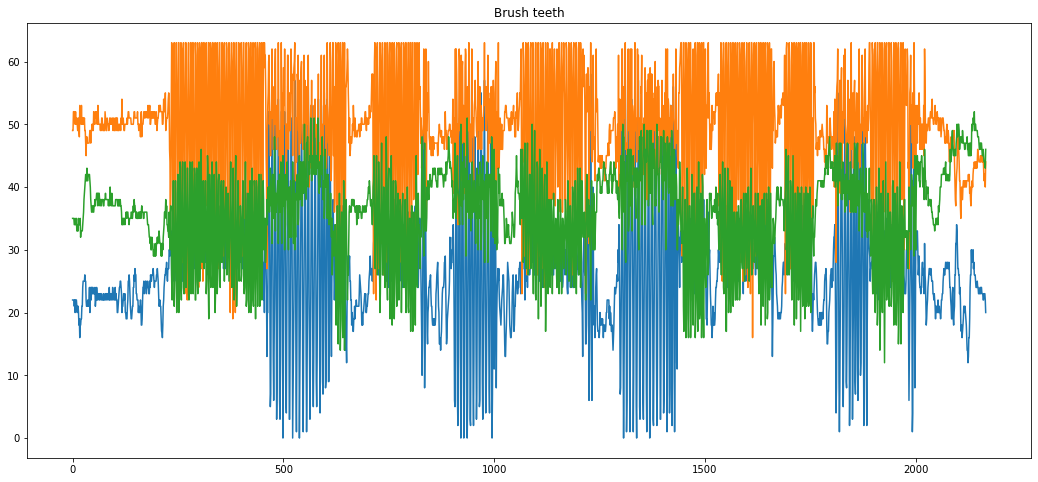

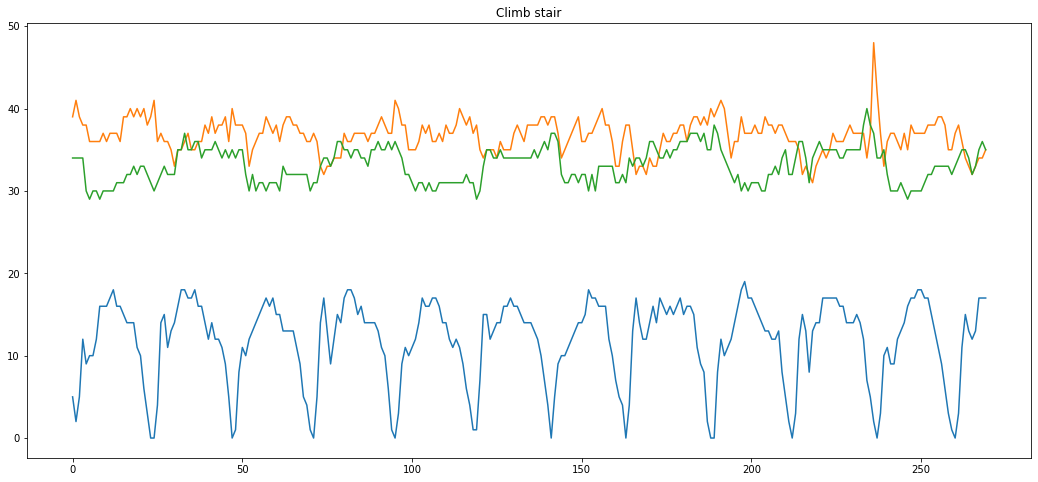

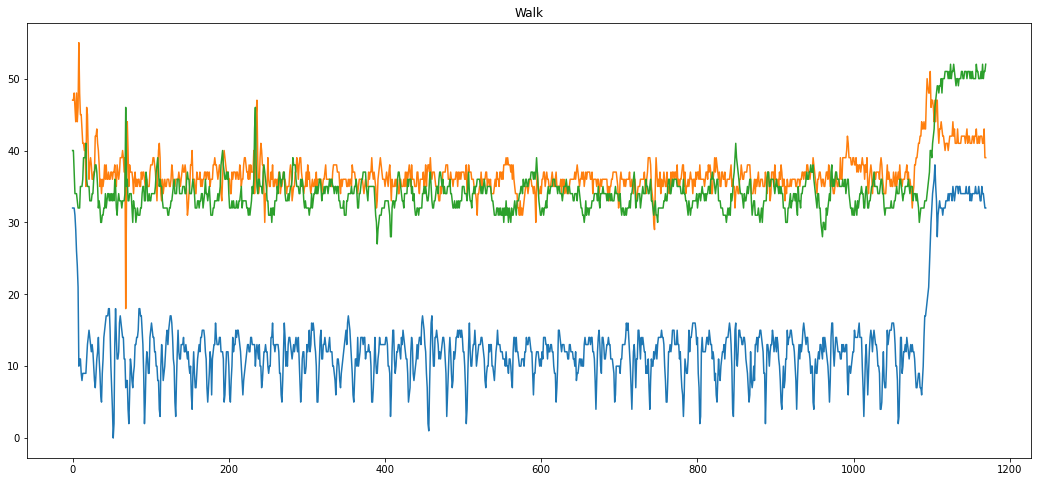

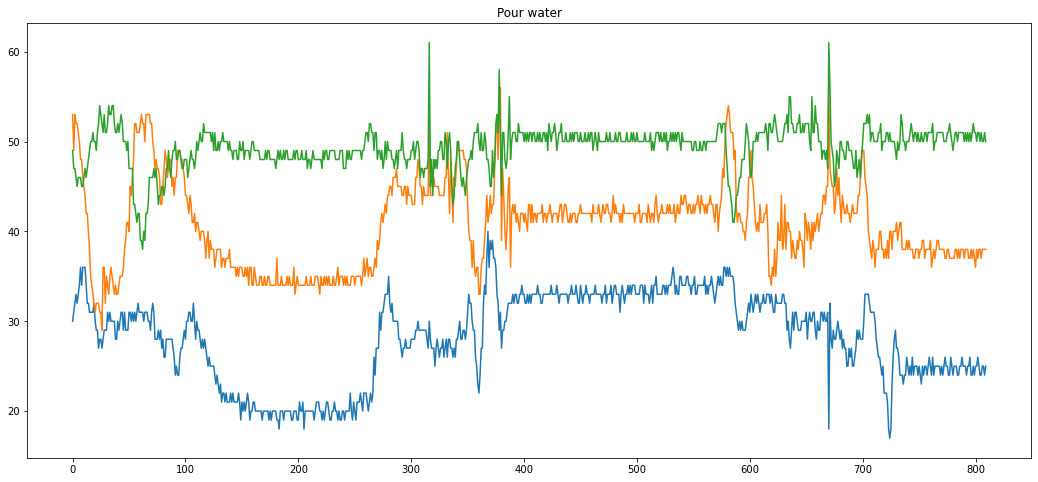

In [12]:
from IPython.display import Image, display
import glob
filenames = glob.glob('assets/actions/*.png')
for f in filenames:
    display(Image(filename=f))

### Ta có thể thấy được sự thay đổi gia tốc của các hành động thông qua các hình trên. Từ đó quá trình Feature Selection được thực hiện.

# Preprocessing

Trước tiên ta cần xử lý qua dữ liệu: 

**- Biến đổi dữ liệu gia tốc kế thành giá trị gia tốc thực:**

Dữ liệu gia tốc thu được trong bộ data được mã hoá như sau:

	[0; +63] = [-1.5g; +1.5g]

Hay:

	real_val = -1.5g + (coded_val/63)*3g

**- Giảm độ nhiễu của tín hiệu bằng hàm median filter**

# Feature Selection

Từ các mẫu x, y và z thay đổi theo thời gian mà chúng ta quan sát được bên trên. Ta sẽ đi chọn các features từ mỗi tệp mà có thể được sử dụng để xây dựng các mô hình có khả năng xác định được các hoạt động: 

- MeanX: giá trị trung bình của trục x trong mỗi file
- MeanY: giá trị trung bình của trục y trong mỗi file
- MeanZ: giá trị trung bình của trục z trong mỗi file
- StdX: giá trị độ lệch chuẩn của trục x trong mỗi file
- StdY: giá trị độ lệch chuẩn của trục y trong mỗi file
- StdZ: giá trị độ lệch chuẩn của trục z trong mỗi file
- Các thống kê khác như là giá trị về covariance hoặc correlation coefficients của dữ liệu...

#### Fast Fourier Transform

Biến đổi Fourier nhanh (FFT) là một triển khai của Biến đổi Fourier rời rạc (DFT). DFT là một hàm phân tích Fourier, nó phân tích dữ liệu dạng sóng hoặc tín hiệu thành các thành phần đơn giản hơn của nó. Khi FFT áp dụng cho một chuỗi thời gian, các thành phần thu được biểu thị thành các thành phần tần số của tín hiệu thời gian.

Vì tín hiệu miền thời gian không thể nắm bắt đủ hết thông tin về các tín hiệu hơn nữa các dữ liệu chuỗi thời gian giữa các quan trắc không có tính tuyến tính với nhau, nên phương pháp biển đổi `Fourier` nhanh (**FFT**) đã được thực hiện nhằm chuyển đổi tín hiệu miền thời gian thành biểu diễn miền tần số tương ứng của nó. Điều này giúp ta bổ sung thêm nhiều feature cho feature vector của các hành động.

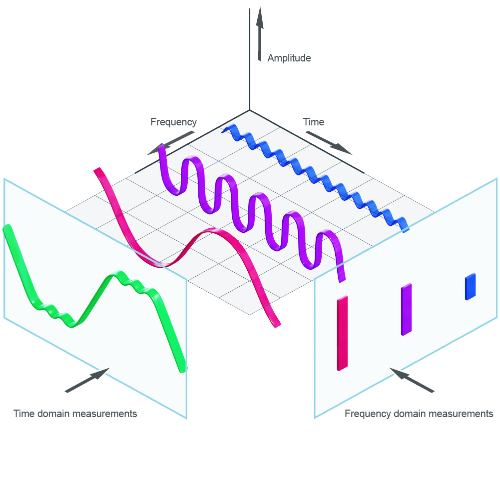

In [13]:
display(Image(filename='assets/fft2.png'))

Giá trị của các tín hiệu sau khi được biến đổi FFT là các số thực, vì thế chúng đã được đưa qua hàm tính `mô-đun của số phức` để có được các giá trị thực. 

**Các feature được trích xuất từ dữ liệu đã được đưa qua FFT:**

- Peak Amplitudes of x: biên độ đỉnh của cột x sau khi được biến đổi Fourier
- Peak Amplitudes of y: biên độ đỉnh của cột y sau khi được biến đổi Fourier
- Peak Amplitudes of z: biên độ đỉnh của cột z sau khi được biến đổi Fourier
- Spectral energy: Cho biết năng lượng quang phổ có trong các tín hiệu để thực hiện một hoạt động thuộc HMP
- Và các thống kê toán học còn lại tương tự như phần feature của dữ liệu theo thời gian...

In [1]:
import os
from FTselection import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.io as plt_io
from scipy.fft import fft, ifft, fft2, ifft2
from scipy.stats import median_abs_deviation as mad
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt_io.renderers.default = "notebook"

In [3]:
def map_to_RAV(TS):
    g = 9.806
    TS[:,0] = -1.5*g + (TS[:,0]/63) * (3*g)
    TS[:,1] = -1.5*g + (TS[:,1]/63) * (3*g)
    TS[:,2] = -1.5*g + (TS[:,2]/63) * (3*g)
    return TS

In [4]:
def filter_median(TS):
    n = 3   # order of the median filter
    from scipy import ndimage, misc
    TS[:,0] = ndimage.median_filter(TS[:,0], size=n)
    TS[:,1] = ndimage.median_filter(TS[:,1], size=n)
    TS[:,2] = ndimage.median_filter(TS[:,2], size=n)
    return TS

In [5]:
def Calcu_features(TS3axis):
    Time = TS3axis
    fftx = fft(Time[:,0])
    ffty = fft(Time[:,1])
    fftz = fft(Time[:,2])
    ft = np.empty(shape=(0,))
    
    ft = np.append(ft, np.mean(Time[:,0]))                  # t mean X
    ft = np.append(ft, np.mean(Time[:,1]))                  # t mean Y
    ft = np.append(ft, np.mean(Time[:,2]))                  # t mean Z
    ft = np.append(ft, np.std(Time[:,0]))                   # t std X
    ft = np.append(ft, np.std(Time[:,1]))                   # t std Y
    ft = np.append(ft, np.std(Time[:,2]))                   # t std Z
    ft = np.append(ft, mad(Time[:,0]))                      # t median absolute deviation X
    ft = np.append(ft, mad(Time[:,1]))                      # t median absolute deviation Y
    ft = np.append(ft, mad(Time[:,2]))                      # t median absolute deviation Z
    ft = np.append(ft, np.median(Time[:,0]))                # t median X
    ft = np.append(ft, np.median(Time[:,1]))                # t median Y
    ft = np.append(ft, np.median(Time[:,2]))                # t median Z
    ft = np.append(ft, np.corrcoef(Time.T)[0,1])            # t corrcoef X
    ft = np.append(ft, np.corrcoef(Time.T)[1,2])            # t corrcoef Y
    ft = np.append(ft, np.corrcoef(Time.T)[0,2])            # t corrcoef Z
    ft = np.append(ft, np.cov(Time.T)[0,0])                 # t cov X
    ft = np.append(ft, np.cov(Time.T)[1,1])                 # t cov Y
    ft = np.append(ft, np.cov(Time.T)[2,2])                 # t cov Z
    ft = np.append(ft, np.cov(Time.T)[0,1])                 # t cov X
    ft = np.append(ft, np.cov(Time.T)[1,2])                 # t cov Y
    ft = np.append(ft, np.cov(Time.T)[0,2])                 # t cov Z
    ft = np.append(ft, np.mean((Time[:,2] > Time[:,0]) & \
                                (Time[:,1] < Time[:,0])))
    ft = np.append(ft, np.sum(Time[:,0] < 10) / Time.shape[0])
    
    ft = np.append(ft, mad(np.abs(fftx)) )                  # f median absolute deviation X
    ft = np.append(ft, mad(np.abs(ffty)) )                  # f median absolute deviation Y
    ft = np.append(ft, mad(np.abs(fftz)) )                  # f median absolute deviation Z
    ft = np.append(ft, np.max(np.abs(fftx)))                   # f max X
    ft = np.append(ft, np.max(np.abs(ffty)))                   # f max Y
    ft = np.append(ft, np.max(np.abs(fftz)))                   # f max Z
    ft = np.append(ft, np.min(np.abs(fftx)))                   # f min X
    ft = np.append(ft, np.min(np.abs(ffty)))                   # f min Y
    ft = np.append(ft, np.min(np.abs(fftz)))                   # f min Z
    ft = np.append(ft, iqr(np.abs(fftx)))                      # f interquartile range x
    ft = np.append(ft, iqr(np.abs(ffty)))                      # f interquartile range y
    ft = np.append(ft, iqr(np.abs(fftz)))                      # f interquartile range z
    ft = np.append(ft, entropy(np.abs(fftx)))                  # f entropy x
    ft = np.append(ft, entropy(np.abs(ffty)))                  # f entropy y
    ft = np.append(ft, entropy(np.abs(fftz)))                  # f entropy z
    ft = np.append(ft, skew(np.abs(fftx)))
    ft = np.append(ft, skew(np.abs(ffty)))
    ft = np.append(ft, skew(np.abs(fftz)))
    ft = np.append(ft, kurtosis(np.abs(fftx)))
    ft = np.append(ft, kurtosis(np.abs(ffty)))
    ft = np.append(ft, kurtosis(np.abs(fftz)))
    ft = np.append(ft, np.max(np.abs(fftx)))                #Peak Amplitude of the Fourier Transform
    ft = np.append(ft, np.max(np.abs(ffty)))
    ft = np.append(ft, np.max(np.abs(fftz)))
    ft = np.append(ft, np.sum(np.abs(fftx)) / len(fftx) + \
                        np.sum(np.abs(ffty)) / len(ffty) + \
                         np.sum(np.abs(fftz)) / len(fftz))      # Spectral energy

    return ft

In [6]:
act_name = [dirname for dirname in os.listdir("HMP_Dataset/.") \
    if os.path.isdir("HMP_Dataset/"+dirname)]
iter = [i for i in range(len(act_name))]

labels = dict(zip(act_name, iter))
labels

{'Drink_glass': 0,
 'Sitdown_chair': 1,
 'Liedown_bed': 2,
 'Pour_water': 3,
 'Climb_stairs': 4,
 'Eat_soup': 5,
 'Comb_hair': 6,
 'Brush_teeth': 7,
 'Walk': 8,
 'Use_telephone': 9,
 'Getup_bed': 10,
 'Standup_chair': 11,
 'Eat_meat': 12,
 'Descend_stairs': 13}

In [8]:
all_arrays = {'vectors':[],
              'labels':[],
			  'num_labels':[]}

for dirname in os.listdir("HMP_Dataset/."):
	if not os.path.isdir("HMP_Dataset/"+dirname): continue
	
	for filename in os.listdir("HMP_Dataset/"+dirname):
		if filename.startswith("."): continue  # Edit added 12/7
		
		v = np.loadtxt("HMP_Dataset/" + dirname + os.sep + filename)
		v = map_to_RAV(v)
		v = filter_median(v)
		v = Calcu_features(v)
		
		all_arrays['vectors'].append(v)
		all_arrays['labels'].append(dirname)
		all_arrays['num_labels'].append(labels[dirname])

In [9]:
df = pd.DataFrame.from_dict(all_arrays)
print(df.shape)
lenV = df.iloc[0,0].shape[0]
print("Len vector: ", lenV)
df.head()

(839, 3)
Len vector:  48


,vectors,labels,num_labels
0,"[2.694957514604354, 3.790299345016816, 6.71005...",Drink_glass,0
1,"[1.527453121693121, 0.9743739682539677, 8.9219...",Drink_glass,0
2,"[2.3191968253968254, 6.658395061728395, 6.4802...",Drink_glass,0
3,"[2.4719456550981973, 2.783247242399785, 9.0317...",Drink_glass,0
4,"[1.2831900972590624, 1.6318561323733736, 8.931...",Drink_glass,0


In [23]:
count_df = df.groupby('labels').count()
count_df = (count_df.reset_index())[['labels','vectors']]
count_df

,labels,vectors
0,Brush_teeth,12
1,Climb_stairs,102
2,Comb_hair,31
3,Descend_stairs,42
4,Drink_glass,100
5,Eat_meat,5
6,Eat_soup,3
7,Getup_bed,101
8,Liedown_bed,28
9,Pour_water,100


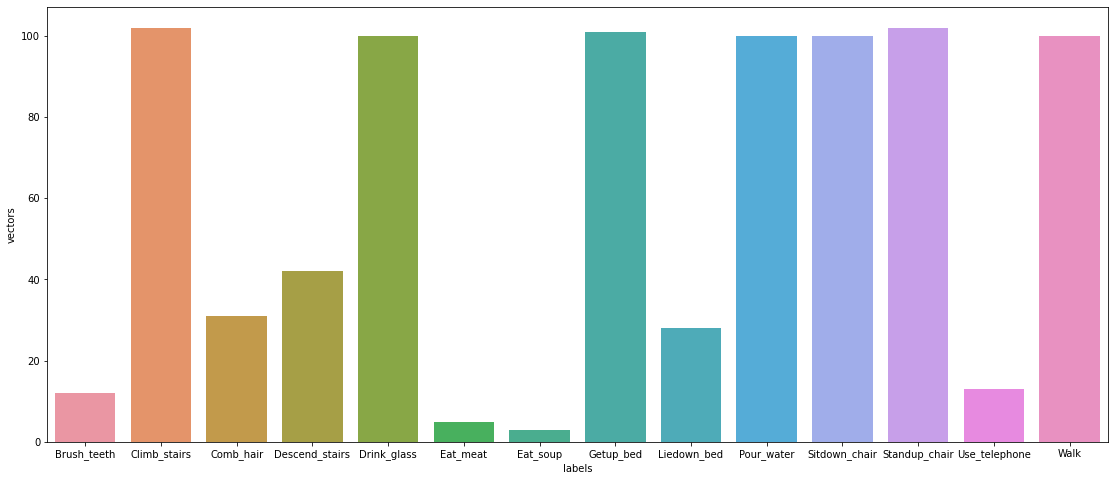

In [28]:
plt.figure(figsize=(19,8))
sns.barplot(x='labels', y='vectors', data=count_df);

In [11]:
col_n_ft = ['FT'+str(i) for i in range(lenV)]
df[col_n_ft] = pd.DataFrame(df.vectors.values.tolist(), index= df.index)
df.head()

,vectors,labels,num_labels,FT0,FT1,FT2,FT3,FT4,FT5,FT6,...,FT38,FT39,FT40,FT41,FT42,FT43,FT44,FT45,FT46,FT47
0,"[2.694957514604354, 3.790299345016816, 6.71005...",Drink_glass,0,2.694958,3.790299,6.710054,2.383583,5.213972,1.841685,1.867810,...,11.812205,11.086036,21.077241,183.620641,133.026637,465.492918,1449.887143,2039.181048,3610.008857,63.980880
1,"[1.527453121693121, 0.9743739682539677, 8.9219...",Drink_glass,0,1.527453,0.974374,8.921903,2.015233,3.964369,1.127449,0.466952,...,9.928688,8.127150,20.714786,109.324003,73.826886,432.605228,687.353905,928.076963,4014.856571,50.457775
2,"[2.3191968253968254, 6.658395061728395, 6.4802...",Drink_glass,0,2.319197,6.658395,6.480261,2.785700,2.460621,1.060052,1.167381,...,7.937667,13.900350,15.811646,68.065921,208.462817,253.144705,626.183143,1797.766667,1749.670571,44.578268
3,"[2.4719456550981973, 2.783247242399785, 9.0317...",Drink_glass,0,2.471946,2.783247,9.031703,2.035693,2.022640,0.665546,0.933905,...,11.293990,11.551437,18.619167,143.816928,163.188645,346.067768,875.068762,985.269524,3197.222952,43.722931
4,"[1.2831900972590624, 1.6318561323733736, 8.931...",Drink_glass,0,1.283190,1.631856,8.931548,2.400873,3.597436,1.194292,0.466952,...,11.768623,9.485888,26.825795,150.283564,95.972407,727.152448,1046.724374,1276.559294,6734.387238,61.130331


In [12]:
df.drop(columns=['vectors']).to_csv('data3.csv')